In [1]:
from utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X, y, classes = load_data(data_dir= 'garbage_classification')

Found 5850 images belonging to 7 classes.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4680, 16384) (1170, 16384) (4680,) (1170,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#Classify models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [11]:
models = {
    'svm': SVC(kernel='linear'),
    'random_forest': RandomForestClassifier(n_estimators=50),
    'decision_tree': DecisionTreeClassifier(),
    'knn': KNeighborsClassifier(n_neighbors=5)
}

Training svm model...
Evaluating svm model...
              precision    recall  f1-score   support

       paper       0.49      0.36      0.41       225
 green-glass       0.24      0.31      0.27       134
       metal       0.28      0.28      0.28       145
  biological       0.35      0.34      0.34       185
     battery       0.43      0.42      0.43       171
 brown-glass       0.29      0.29      0.29       127
     plastic       0.43      0.49      0.45       183

    accuracy                           0.36      1170
   macro avg       0.36      0.35      0.35      1170
weighted avg       0.37      0.36      0.36      1170



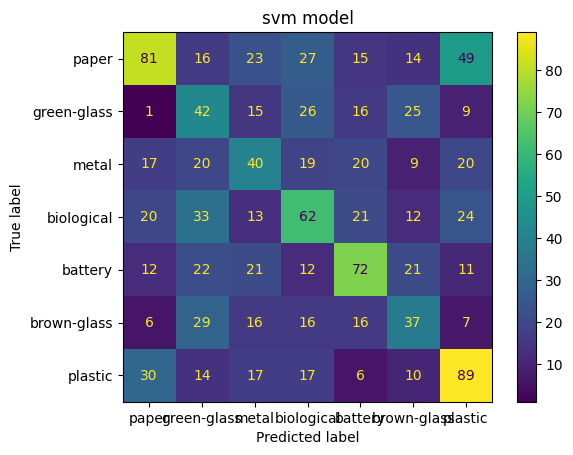

svm model saved as svm.pkl

Training random_forest model...
Evaluating random_forest model...
              precision    recall  f1-score   support

       paper       0.62      0.67      0.64       225
 green-glass       0.44      0.33      0.38       134
       metal       0.54      0.47      0.50       145
  biological       0.44      0.60      0.51       185
     battery       0.56      0.65      0.60       171
 brown-glass       0.57      0.40      0.47       127
     plastic       0.62      0.54      0.58       183

    accuracy                           0.54      1170
   macro avg       0.54      0.52      0.52      1170
weighted avg       0.55      0.54      0.54      1170



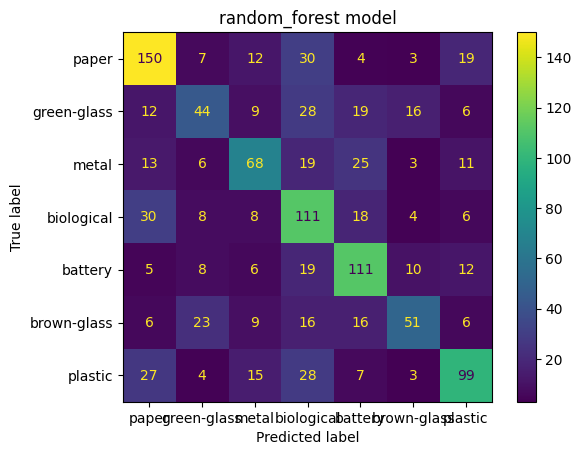

random_forest model saved as random_forest.pkl

Training decision_tree model...
Evaluating decision_tree model...
              precision    recall  f1-score   support

       paper       0.53      0.52      0.52       225
 green-glass       0.34      0.30      0.32       134
       metal       0.28      0.28      0.28       145
  biological       0.36      0.41      0.38       185
     battery       0.48      0.52      0.50       171
 brown-glass       0.33      0.33      0.33       127
     plastic       0.47      0.44      0.46       183

    accuracy                           0.41      1170
   macro avg       0.40      0.40      0.40      1170
weighted avg       0.41      0.41      0.41      1170



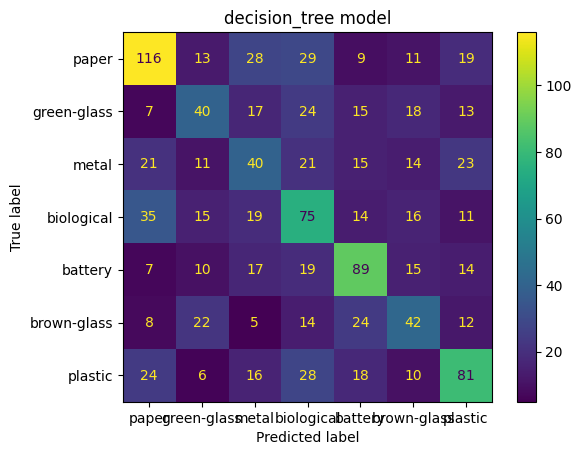

decision_tree model saved as decision_tree.pkl

Training knn model...
Evaluating knn model...
              precision    recall  f1-score   support

       paper       0.51      0.26      0.34       225
 green-glass       0.33      0.37      0.35       134
       metal       0.35      0.39      0.37       145
  biological       0.42      0.29      0.34       185
     battery       0.88      0.39      0.54       171
 brown-glass       0.51      0.24      0.32       127
     plastic       0.29      0.78      0.43       183

    accuracy                           0.39      1170
   macro avg       0.47      0.39      0.39      1170
weighted avg       0.48      0.39      0.39      1170



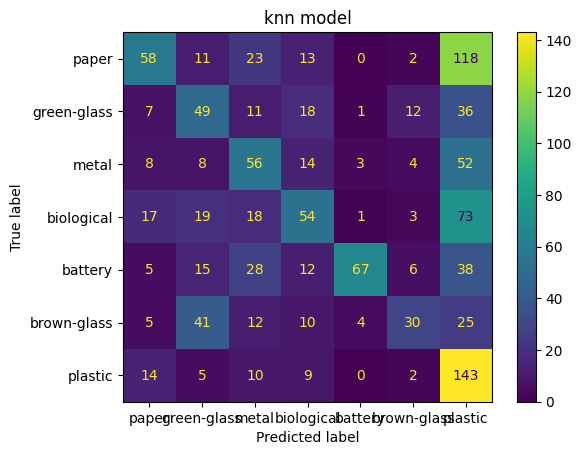

knn model saved as knn.pkl



In [12]:
#Evaluate models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

for name, model in models.items():
    print(f'Training {name} model...')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Evaluating {name} model...')
    print(classification_report(y_test, y_pred, target_names=classes))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()
    plt.title(f'{name} model')
    plt.show()
    with open(f'{name}.pkl', 'wb') as f:
        pickle.dump(model, f)
    print(f'{name} model saved as {name}.pkl\n')


              precision    recall  f1-score   support

       paper       0.36      0.17      0.23       225
 green-glass       0.36      0.15      0.21       134
       metal       0.32      0.14      0.19       145
  biological       0.40      0.59      0.48       185
     battery       0.39      0.73      0.51       171
 brown-glass       0.34      0.20      0.25       127
     plastic       0.35      0.54      0.43       183

    accuracy                           0.37      1170
   macro avg       0.36      0.36      0.33      1170
weighted avg       0.36      0.37      0.34      1170



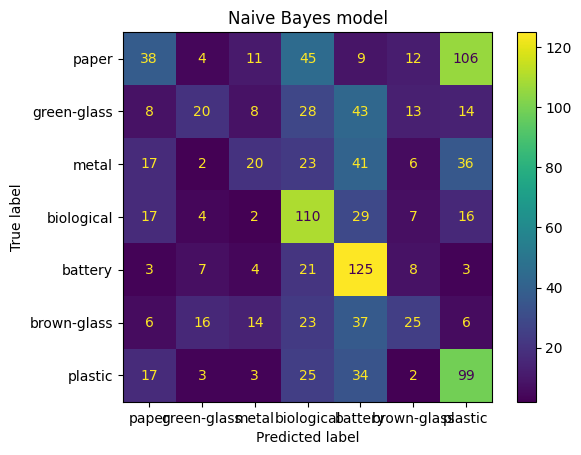

In [13]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=classes))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Naive Bayes model')
plt.show()


In [14]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
}

model = SVC()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

#Save the best model
model = grid_search.best_estimator_
with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(model, f)
print('Best model saved as best_model.pkl')

{'C': 1, 'kernel': 'rbf'}
0.5495726495726496
{'mean_fit_time': array([307.49747715, 240.79428439, 287.98042436, 203.34293046]), 'std_fit_time': array([11.63290039,  1.51826666,  4.4955831 ,  2.68522099]), 'mean_score_time': array([46.27429042, 65.21724577, 42.6710712 , 64.11920209]), 'std_score_time': array([2.6525693 , 0.35727872, 0.19257306, 0.40894035]), 'param_C': masked_array(data=[0.1, 0.1, 1, 1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1, 'kernel': 'linear'}, {'C': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}], 'split0_test_score': array([0.39209402, 0.46047009, 0.39209402, 0.5715812 ]), 'split1_test_score': array([0.38354701, 0.45619658, 0.38354701, 0.54594017]), 'split2_test_score': array([0.36858974, 0

              precision    recall  f1-score   support

       paper       0.61      0.59      0.60       225
 green-glass       0.43      0.34      0.38       134
       metal       0.45      0.40      0.42       145
  biological       0.44      0.57      0.50       185
     battery       0.59      0.70      0.64       171
 brown-glass       0.55      0.40      0.46       127
     plastic       0.59      0.58      0.58       183

    accuracy                           0.53      1170
   macro avg       0.52      0.51      0.51      1170
weighted avg       0.53      0.53      0.52      1170



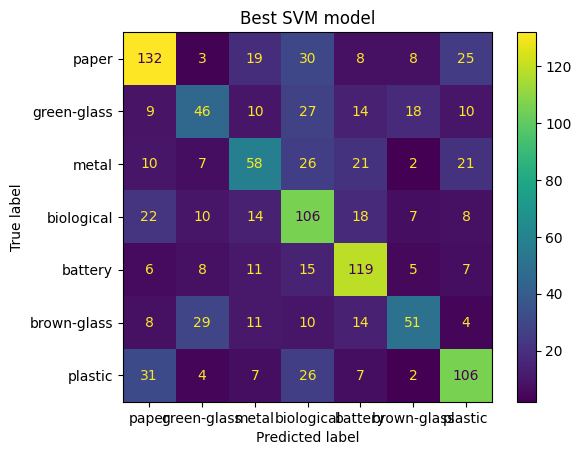

In [15]:
model = pickle.load(open('best_svm_model.pkl', 'rb'))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=classes))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Best SVM model')
plt.show()
